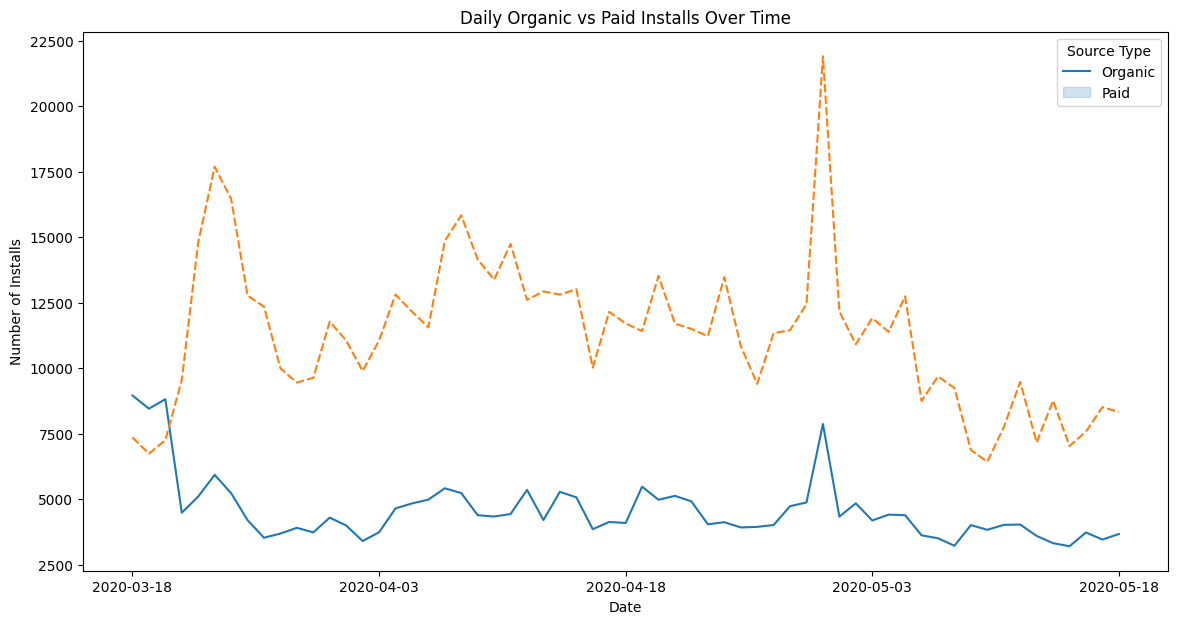

Pearson Correlation Coefficient: 0.22434074422603636
P-value: 0.08218628724204957


In [9]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.stats import pearsonr
import zipfile

# Распаковка файла базы данных
zip_path = r'./testcase.db.zip'
extract_folder = r'./testcase_db'

# Распаковка файла
os.makedirs(extract_folder, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Подключение к базе данных
db_path = os.path.join(extract_folder, 'testcase.db')
conn = sqlite3.connect(db_path)

# Загрузка данных из таблицы source_comparison
source_comparison_df = pd.read_sql("SELECT * FROM source_comparison", conn)

# Закрытие соединения с базой данных
conn.close()

# Подготовка данных для анализа
# Группировка данных по дате и источнику
grouped_data = source_comparison_df.groupby(['Install_Dates', 'source_type'])['installs'].sum().unstack()
grouped_data = grouped_data.fillna(0)

# Визуализация данных
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped_data)
plt.title('Daily Organic vs Paid Installs Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Installs')
plt.legend(title='Source Type', labels=['Organic', 'Paid'])
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.show()

# Расчет корреляции
corr, p_value = pearsonr(grouped_data['Organic'], grouped_data['Paid'])

# Вывод результатов корреляции
print(f'Pearson Correlation Coefficient: {corr}')
print(f'P-value: {p_value}')

Monthly Correlation Coefficient: 0.9963761067368088
Monthly P-value: 0.05421432562342441


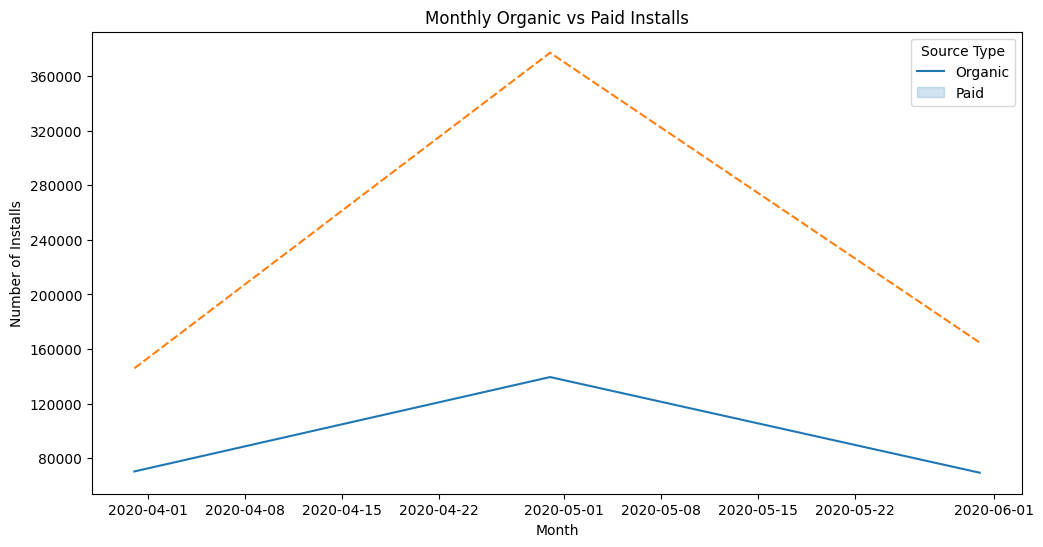

In [7]:
# Подключение к базе данных
db_path = os.path.join(extract_folder, 'testcase.db')
conn = sqlite3.connect(db_path)

# Загрузка данных из таблицы source_comparison
source_comparison_df = pd.read_sql("SELECT * FROM source_comparison", conn)

# Закрытие соединения с базой данных
conn.close()

# Подготовка и агрегация данных
source_comparison_df['Install_Dates'] = pd.to_datetime(source_comparison_df['Install_Dates'])
grouped_data = source_comparison_df.groupby(['Install_Dates', 'source_type'])['installs'].sum().unstack()
grouped_data = grouped_data.fillna(0)

# Установка Install_Dates в качестве индекса для ресемплирования
grouped_data.index = pd.to_datetime(grouped_data.index)

# Агрегация данных по месяцам
monthly_data = grouped_data.resample('M').sum()

# Расчет корреляции между рекламным и органическим траффиком
corr_monthly, p_value_monthly = pearsonr(monthly_data['Paid'], monthly_data['Organic'])

# Визуализация месячных данных
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data)
plt.title('Monthly Organic vs Paid Installs')
plt.xlabel('Month')
plt.ylabel('Number of Installs')
plt.legend(title='Source Type', labels=['Organic', 'Paid'])

# Оптимизация оси Y для улучшения читаемости
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# Вывод результатов корреляции
print(f'Monthly Correlation Coefficient: {corr_monthly}')
print(f'Monthly P-value: {p_value_monthly}')